In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import layers
import keras_tuner as kt
from sklearn.model_selection import train_test_split

#Normalização dos anos
ano = np.array([1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])

ano_media = np.mean(ano)
ano_std = np.sqrt( np.sum((ano - ano_media)**2)/53  )
ano_normalizado = (ano - ano_media)/ano_std

#Dados disponíveis para pesca industrial
anos_com_dados = np.delete(ano, [0,1,2,3,4,5,6,7,8,14,21,22,23,24,25,26])

anos_com_dados_norm = np.delete(ano_normalizado, [0,1,2,3,4,5,6,7,8,14,21,22,23,24,25,26])
pesca_ind = np.array([3,2,2,20,12,4,5,10,6,2,3,135,265,258.5,359.5,366.5,355.5,321,327.5,376,381.5,476,555.5,4.284,10.863,128.989,581.805,363.783,341.525,261.919,22.265,0.944,51.736,89.219,39.028,10.009,43.081,21.172])

pi_media = np.mean(pesca_ind)
pi_std = np.sqrt( np.sum((pesca_ind - pi_media)**2)/37 )
pi_normalizado = (pesca_ind - pi_media)/pi_std


#Colocando dados normalizados no formato de entrada da rede
anos_com_dados_norm = anos_com_dados_norm.reshape(38,1)
pi_normalizado = pi_normalizado.reshape((38,1))

#Dados a serem preditos(anos sem pesca industrial)
aspi_normalizado = np.array([])
anos_sem_pesca_ind=np.array([])
for i in [0,1,2,3,4,5,6,7,8,14,21,22,23,24,25,26]:
    aspi_normalizado = np.append(aspi_normalizado,ano_normalizado[i])
    anos_sem_pesca_ind = np.append(anos_sem_pesca_ind,ano[i])


In [ ]:
#Fit do modelo e salvando seus pesos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras') 
history = model.fit(anos_com_dados_norm,pi_normalizado, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Projeto da pesca/Polvos/pesos pesca ind/.weights.h5', overwrite=True)

In [5]:
#Pegando o modelo e seus pesos salvosano_normalizado
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras') 
model.load_weights('/home/andre/Área de Trabalho/Projeto da pesca/Polvos/pesos pesca ind/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [ 2.4834595]
 [ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [29.712143 ]
 [62.900497 ]
 [94.69163  ]]


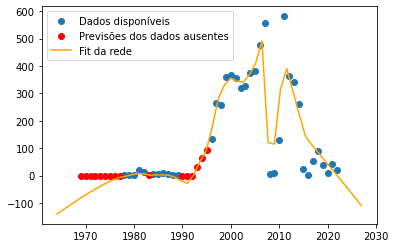

In [8]:
#Previsões
prev_geral = model.predict(anos_com_dados)*pi_std + pi_media
prev_ausentes = model.predict(aspi_normalizado)*pi_std + pi_media

#Transformando valores negativos em zero
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
        

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca_ind,label='Dados disponíveis')
f1.scatter(anos_sem_pesca_ind,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pi_std + pi_media
f1.plot(p*ano_std + ano_media,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

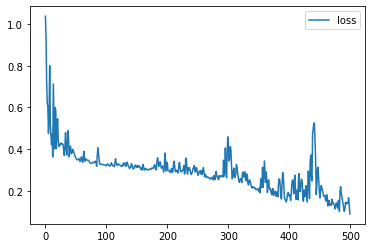

In [9]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()